In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import random

In [ ]:
from tensorflow import keras
import sklearn
from keras.models import  Model
from keras.layers import *
from keras.regularizers import *
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import *
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from scipy.stats import norm
from sklearn.cluster import KMeans

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.options.display.max_rows = 60
# pd.options.display.max_columns = 20

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/SER_0817/EMODB_cnn_lstm/cluster/PAD_7after_2anomal_2.xlsx')
df= df.iloc[:,1:]

In [ ]:
anger = []
boredom = []
disgust = []
anxiety_fear = []
happiness = []
sadness = []
neutral = []

happiness.append(np.mean(df[df['cluster']==0]['P_MEAN']))
happiness.append(np.mean(df[df['cluster']==0]['A_MEAN']))
happiness.append(np.mean(df[df['cluster']==0]['D_MEAN']))


anger.append(np.mean(df[df['cluster']==1]['P_MEAN']))
anger.append(np.mean(df[df['cluster']==1]['A_MEAN']))
anger.append(np.mean(df[df['cluster']==1]['D_MEAN']))

neutral.append(np.mean(df[df['cluster']==2]['P_MEAN']))
neutral.append(np.mean(df[df['cluster']==2]['A_MEAN']))
neutral.append(np.mean(df[df['cluster']==2]['D_MEAN']))

sadness.append(np.mean(df[df['cluster']==3]['P_MEAN']))
sadness.append(np.mean(df[df['cluster']==3]['A_MEAN']))
sadness.append(np.mean(df[df['cluster']==3]['D_MEAN']))

disgust.append(np.mean(df[df['cluster']==4]['P_MEAN']))
disgust.append(np.mean(df[df['cluster']==4]['A_MEAN']))
disgust.append(np.mean(df[df['cluster']==4]['D_MEAN']))

anxiety_fear.append(np.mean(df[df['cluster']==5]['P_MEAN']))
anxiety_fear.append(np.mean(df[df['cluster']==5]['A_MEAN']))
anxiety_fear.append(np.mean(df[df['cluster']==5]['D_MEAN']))

boredom.append(np.mean(df[df['cluster']==6]['P_MEAN']))
boredom.append(np.mean(df[df['cluster']==6]['A_MEAN']))
boredom.append(np.mean(df[df['cluster']==6]['D_MEAN']))

[-0.13187500000000002, -0.35125, -0.194375]

In [ ]:
db = []
db.append(anger)
db.append(boredom)
db.append(disgust)
db.append(anxiety_fear)
db.append(happiness)
db.append(sadness)
db.append(neutral)
db

[[-0.45444444444444443, 0.5511111111111111, 0.1822222222222222],
 [-0.13187500000000002, -0.35125, -0.194375],
 [-0.2806666666666667, 0.2753333333333333, 0.18666666666666668],
 [-0.5646153846153846, 0.4369230769230769, -0.35923076923076924],
 [0.7031578947368421, 0.3352631578947369, 0.4189473684210526],
 [-0.5868181818181818, -0.13727272727272727, -0.32499999999999996],
 [0.46214285714285713, -0.045714285714285714, -0.08]]

In [ ]:
db_index = pd.Index(['anger', 'boredom', 'disgust', 'anxiety_fear', 'happiness', 'sadness', 'neutral'])
db_columns = ['P', 'A','D']

In [ ]:
dat = pd.DataFrame(data = db, index =db_index, columns = db_columns)
dat

,P,A,D
anger,-0.454444,0.551111,0.182222
boredom,-0.131875,-0.351250,-0.194375
disgust,-0.280667,0.275333,0.186667
anxiety_fear,-0.564615,0.436923,-0.359231
happiness,0.703158,0.335263,0.418947
sadness,-0.586818,-0.137273,-0.325000
neutral,0.462143,-0.045714,-0.080000


In [ ]:
dat.to_csv('/content/drive/MyDrive/SER_0817/EMODB_cnn_lstm/PAD_data_7after_2anomal_2.csv')

# 데이터 도출(클러스터링)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/SER_0817/EMODB_cnn_lstm/cluster/check87.xlsx')
df= df.iloc[:,1:]

In [ ]:
df[df['cluster']==3]

In [ ]:
idx = df[(df['cluster']==1)|(df['cluster']==4)].index
idx

Int64Index([ 0,  3, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
            39, 40, 41, 42, 43, 49, 52, 58, 63, 64, 65, 66, 68, 69, 71, 73,
            74],
           dtype='int64')

In [ ]:
df.drop(idx , inplace=True)

In [ ]:
##################################################

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/SER_0817/EMODB_cnn_lstm/cluster/check87_anomaly_fix.xlsx')
data= data.iloc[:,1:]

In [ ]:
data_1 = data[data['new_cluster']==1]
data_2 = data[data['new_cluster']==2]

In [ ]:
data_1 = data_1.drop(['cluster'], axis  = 1)
data_2 = data_2.drop(['cluster'], axis  = 1)

In [ ]:
data_1.rename(columns = {'new_cluster' : 'cluster'}, inplace = True)
data_2.rename(columns = {'new_cluster' : 'cluster'}, inplace = True)

In [ ]:
data_2.replace({'cluster':2},4, inplace = True)

In [ ]:
#######################################################

In [ ]:
df.drop(['check_cluster'], axis  = 1,inplace = True)
df

In [ ]:
new_df = pd.concat([df, data_1], axis = 0)
new_df = pd.concat([new_df, data_2], axis = 0)

In [ ]:
new_df.to_excel('/content/drive/MyDrive/SER_0817/EMODB_cnn_lstm/cluster/PAD_7after_2anomal.xlsx')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/SER_0817/EMODB_cnn_lstm/cluster/PAD_7after_2anomal.xlsx')
df= df.iloc[:,1:]

In [ ]:
df

,TERM_K,TERM,N,P_MEAN,P_SD,A_MEAN,A_SD,D_MEAN,D_SD,cluster
0,희망,Hopeful,29,0.51,0.30,0.23,0.33,0.14,0.41,2
1,저주 받은,Devoted,30,0.49,0.25,0.17,0.27,0.10,0.37,2
2,협력적인,Cooperative,31,0.39,0.32,0.13,0.27,0.03,0.34,2
3,고마운,Thankful,27,0.61,0.25,0.10,0.34,-0.13,0.35,2
4,존경하는,Respectful,27,0.38,0.39,0.13,0.29,-0.08,0.49,2
...,...,...,...,...,...,...,...,...,...,...
103,책임을 짊어지다,Burdened with responsibility,30,-0.08,0.41,0.28,0.31,0.19,0.47,4
104,적대적이지만 통제됨,Hostile but controlled,30,-0.24,0.31,0.42,0.35,0.09,0.38,4
105,불쾌,Displeased,29,-0.55,0.21,0.16,0.34,-0.05,0.41,4
106,화가 났지만 분리,Angry but detached,30,-0.42,0.22,0.28,0.41,-0.03,0.33,4


In [ ]:
from sklearn.cluster import KMeans
k = 7
model = KMeans(n_clusters = k, random_state = 10)

In [ ]:
from sklearn.cluster import KMeans
k = 8
model = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 42)

In [ ]:
df_3 = copy.deepcopy(df)

In [ ]:
X = df_3.iloc[:,[3,5,7]]
X

,P_MEAN,A_MEAN,D_MEAN
0,0.51,0.23,0.14
1,0.49,0.17,0.10
2,0.39,0.13,0.03
3,0.61,0.10,-0.13
4,0.38,0.13,-0.08
...,...,...,...
103,-0.08,0.28,0.19
104,-0.24,0.42,0.09
105,-0.55,0.16,-0.05
106,-0.42,0.28,-0.03


In [ ]:
model.fit(X)

KMeans(n_init=10, random_state=42)

In [ ]:
df_3['cluster'] = model.fit_predict(X)
df_3

,TERM_K,TERM,N,P_MEAN,P_SD,A_MEAN,A_SD,D_MEAN,D_SD,cluster
0,용감한,Bold,27.0,0.44,0.32,0.61,0.24,0.66,0.30,1
1,유용한,Useful,27.0,0.70,0.20,0.44,0.28,0.47,0.40,1
2,거대한,Mighty,27.0,0.48,0.37,0.51,0.28,0.69,0.31,1
3,친절한,Kind,27.0,0.73,0.22,0.19,0.32,0.57,0.27,1
4,자기 만족,Self-satisfied,27.0,0.86,0.10,0.20,0.40,0.62,0.31,1
...,...,...,...,...,...,...,...,...,...,...
146,무관심한,Uninterested,30.0,-0.41,0.26,-0.50,0.22,-0.08,0.24,7
147,떨어져 있는,Detached,30.0,-0.31,0.34,-0.26,0.28,-0.14,0.29,7
148,불만,Discontented,30.0,-0.53,0.19,-0.16,0.41,-0.26,0.30,6
149,낙담,Discouraged,30.0,-0.61,0.25,-0.15,0.32,-0.29,0.32,6


In [ ]:
X_2 = X.to_numpy()

In [ ]:
labels = (df_3['cluster']).to_numpy()

In [ ]:
intra_cluster_distance_type = 'cmpl_dd'
inter_cluster_distance_type = 'av_cent_ld'
get_Dunn_index(X_2,labels, intra_cluster_distance_type, inter_cluster_distance_type)

0.466703052851614

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X_2, labels, metric='euclidean')


0.36007856660152165

In [ ]:
silhouette_coef, silhouette_val_list = get_silhouette_results(X_2, labels)
print(silhouette_coef)

0.6199599056456372


-----

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=19, n_init=10),
                 k=(1, 20))

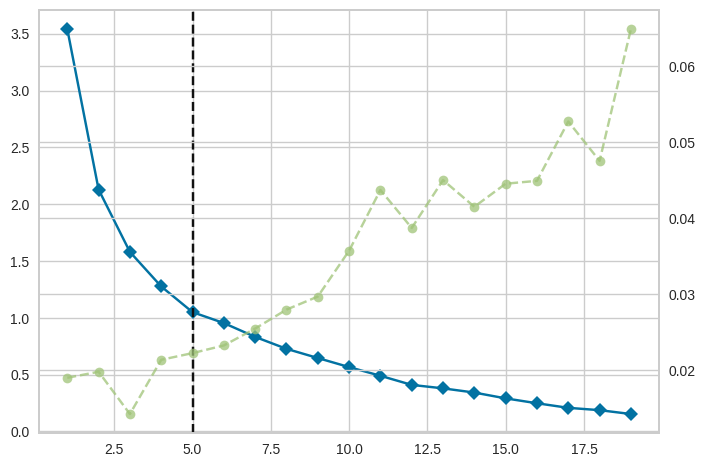

In [ ]:
model = KMeans(n_init = 10)
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X)

---

In [ ]:
import os
os.chdir('/content/drive/MyDrive/SER_0817/EMODB_cnn_lstm')

In [ ]:
%run cluster_eval.py

In [ ]:
from cluster_eval import get_Dunn_index
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from itertools import combinations
def complete_diameter_distance(X):
    res = []
    for i, j in combinations(range(X.shape[0]),2):
        a_i = X[i, :]
        a_j = X[j, :]
        res.append(np.linalg.norm(a_i-a_j))

    return np.max(res)

def average_diameter_distance(X):
    res = []
    for i, j in combinations(range(X.shape[0]),2):
        a_i = X[i, :]
        a_j = X[j, :]
        res.append(np.linalg.norm(a_i-a_j))

    return np.mean(res)

def centroid_diameter_distance(X):
    center = np.mean(X, axis=0)
    res = 2*np.mean([np.linalg.norm(x-center) for x in X])

    return res

def single_linkage_distance(X1, X2):
    res = []
    for x1 in X1:
        for x2 in X2:
            res.append(np.linalg.norm(x1-x2))
    return np.min(res)

def complete_linkage_distance(X1, X2):
    res = []
    for x1 in X1:
        for x2 in X2:
            res.append(np.linalg.norm(x1-x2))
    return np.max(res)

def average_linkage_distance(X1, X2):
    res = []
    for x1 in X1:
        for x2 in X2:
            res.append(np.linalg.norm(x1-x2))
    return np.mean(res)


def centroid_linkage_distance(X1, X2):
    center1 = np.mean(X1, axis=0)
    center2 = np.mean(X2, axis=0)
    return np.linalg.norm(center1-center2)


def average_of_centroids_linkage_distance(X1, X2):
    center1 = np.mean(X1, axis=0)
    center2 = np.mean(X2, axis=0)
    res = []
    for x1 in X1:
        res.append(np.linalg.norm(x1-center2))
    for x2 in X2:
        res.append(np.linalg.norm(x2-center1))

    return np.mean(res)

def get_Dunn_index(X, labels, intra_cluster_distance_type,
                   inter_cluster_distance_type):

    intra_cdt_dict = {
        'cmpl_dd':complete_diameter_distance,
        'avdd' : average_diameter_distance,
        'cent_dd' : centroid_diameter_distance
    }
    inter_cdt_dict = {
        'sld' : single_linkage_distance,
        'cmpl_ld' :complete_linkage_distance,
        'avld': average_linkage_distance,
        'cent_ld' : centroid_linkage_distance,
        'av_cent_ld' : average_of_centroids_linkage_distance
    }
    # intra cluster distance
    intra_cluster_distance = intra_cdt_dict[intra_cluster_distance_type]

    # inter cluster distance
    inter_cluster_distance = inter_cdt_dict[inter_cluster_distance_type]

    # get minimum value of inter_cluster_distance
    res1 = []
    for i, j in combinations(np.unique(labels),2):
        X1 = X[np.where(labels==i)[0], :]
        X2 = X[np.where(labels==j)[0], :]
        res1.append(inter_cluster_distance(X1, X2))
    min_inter_cd = np.min(res1)

    # get maximum value of intra_cluser_distance

    res2 = []
    for label in np.unique(labels):
        X_target = X[np.where(labels==label)[0], :]
        if X_target.shape[0] >= 2:
            res2.append(intra_cluster_distance(X_target))
        else:
            res2.append(0)
    max_intra_cd = np.max(res2)

    Dunn_idx = min_inter_cd/max_intra_cd
    return Dunn_idx

In [ ]:
def get_silhouette_results(X, labels):
    def get_sum_distance(target_x, target_cluster):
        res = np.sum([np.linalg.norm(target_x-x) for x in target_cluster])
        return res

    '''
    각 데이터 포인트를 돌면서 a(i), b(i)를 계산
    그리고 s(i)를 계산한다.

    마지막으로 Silhouette(실루엣) Coefficient를 계산한다.
    '''
    uniq_labels = np.unique(labels)
    silhouette_val_list = []
    for i in range(len(labels)):
        target_data = X[i]

        ## calculate a(i)
        target_label = labels[i]
        target_cluster_data_idx = np.where(labels==target_label)[0]
        if len(target_cluster_data_idx) == 1:
            silhouette_val_list.append(0)
            continue
        else:
            target_cluster_data = X[target_cluster_data_idx]
            temp1 = get_sum_distance(target_data, target_cluster_data)
            a_i = temp1/(target_cluster_data.shape[0]-1)

        ## calculate b(i)
        b_i_list = []
        label_list = uniq_labels[np.unique(labels) != target_label]
        for ll in label_list:
            other_cluster_data_idx = np.where(labels==ll)[0]
            other_cluster_data = X[other_cluster_data_idx]
            temp2 = get_sum_distance(target_data, other_cluster_data)
            temp_b_i = temp2/other_cluster_data.shape[0]
            b_i_list.append(temp_b_i)

        b_i = min(b_i_list)
        s_i = (b_i-a_i)/max(a_i, b_i)
        silhouette_val_list.append(s_i)

    silhouette_coef_list = []
    for ul in uniq_labels:
        temp3 = np.mean([s for s, l in zip(silhouette_val_list, labels) if l == ul])
        silhouette_coef_list.append(temp3)

    silhouette_coef = max(silhouette_coef_list)
    return (silhouette_coef, np.array(silhouette_val_list))

In [ ]:
cluster_num_candidates = range(2,11)
Dunn_index_list = []
silhouette_list = []
for k in cluster_num_candidates:
    kmeans = KMeans(n_clusters=k, random_state=100).fit(X_2)
    kmeans_labels = kmeans.labels_
    Dunn_index = get_Dunn_index(X_2, kmeans_labels)
    ss = silhouette_score(X_2, kmeans_labels, metric='euclidean')

    Dunn_index_list.append(Dunn_index)
    silhouette_list.append(ss)

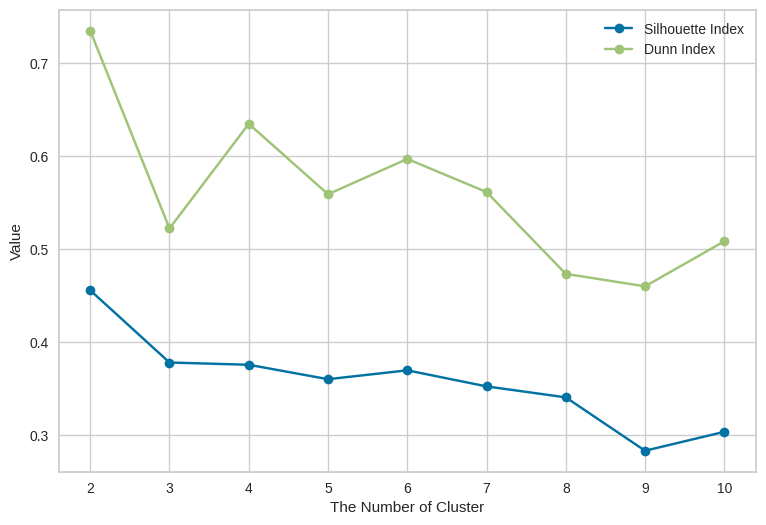

In [ ]:
fig = plt.figure(figsize=(9,6))
fig.set_facecolor('white')

plt.plot(cluster_num_candidates, silhouette_list, marker='o', label='Silhouette Index')
plt.plot(cluster_num_candidates, Dunn_index_list, marker='o', label='Dunn Index')

plt.legend()
plt.xlabel('The Number of Cluster')
plt.ylabel('Value')
plt.show()

In [ ]:
a.to_excel('/content/drive/MyDrive/SER_0817/EMODB_cnn_lstm/SER_PAD.xlsx')

--------------

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=19), k=(1, 20))

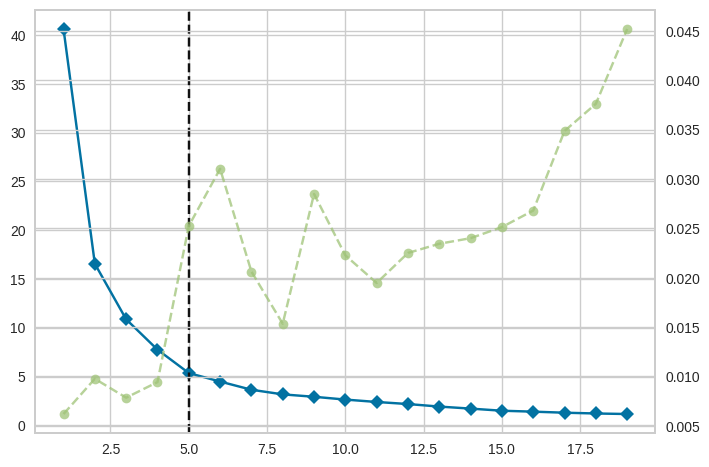

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X)